In [2]:
import numpy as np
import math
import networkx as nx
import pandas as pd

import matplotlib.pyplot as plt

In [3]:
# Function to scale the weights such that the longest edge is 100
def scale_weights(graph):
    max_weight = max(d['weight'] for u, v, d in graph.edges(data=True))
    scale_factor = 100 / max_weight
    
    # Scale all weights
    for u, v in graph.edges():
        graph.edges[u, v]['weight'] *= scale_factor
    
    return graph

### Generate graphs

#### Complete graphs

In [4]:
# Function to generate positions for a regular polygon
def regular_polygon_positions(n):
    angle_step = 2 * math.pi / n
    positions = {}
    for i in range(n):
        angle = i * angle_step
        positions[i] = np.array([math.cos(angle), math.sin(angle)])
    return positions


# Function to add Euclidean distance as weights based on regular polygon positions
def add_euclidean_weights_regular_polygon(graph):
    n = len(graph.nodes())
    pos = regular_polygon_positions(n)
    # Calculate Euclidean distance between nodes and set as edge weights
    for u, v in graph.edges():
        dist = np.linalg.norm(pos[u] - pos[v])
        graph.edges[u, v]['weight'] = dist
    return graph, pos


# Create a dictionary to store graphs for K4 to K30
complete_graphs_unw = {}

# Generate and store the complete graphs
for n in range(4,20+1):
    complete_graphs_unw[f'K{n}'] = nx.complete_graph(n)

# Initialize an empty list to store the scaled weighted graphs
complete_graphs = []

# generate weights and scale
for n in range(4,20+1):
    weighted_graph, pos = add_euclidean_weights_regular_polygon(complete_graphs_unw[f'K{n}'])
    scaled_graph = scale_weights(weighted_graph)
    complete_graphs.append(scaled_graph)

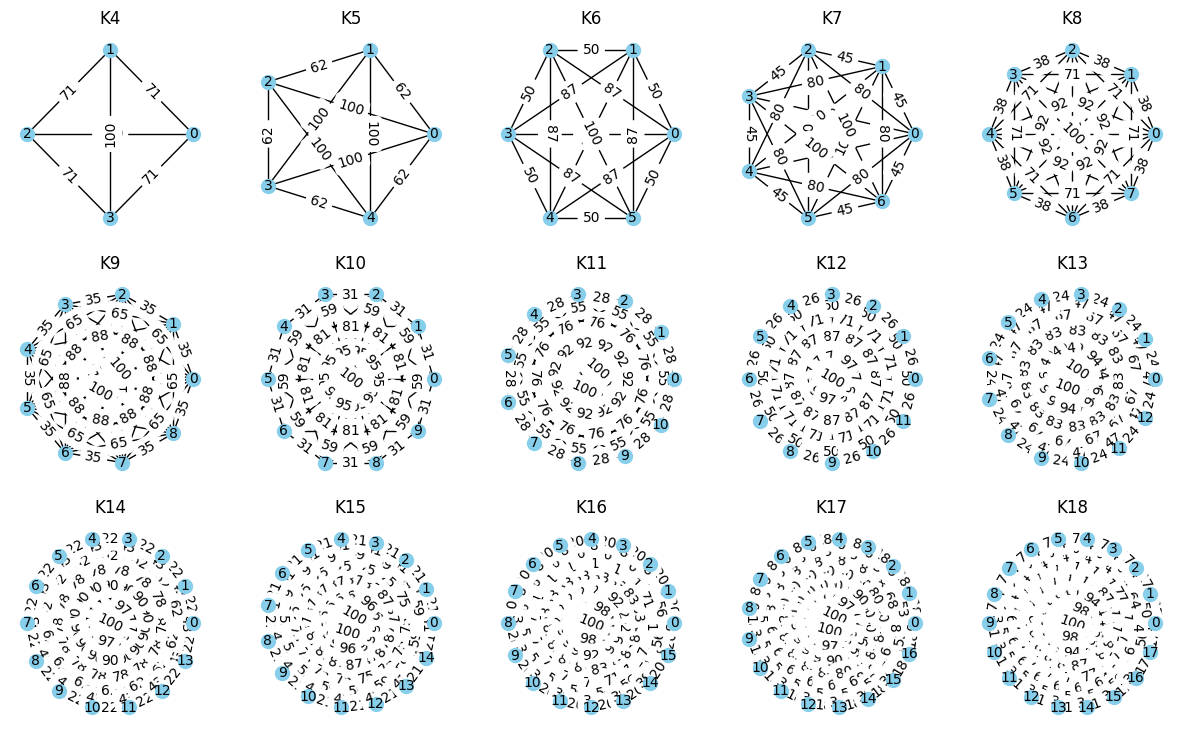

In [5]:
# Visualize graphs from K4 to K8
fig, axes = plt.subplots(3, 5, figsize=(15, 9))
axes = axes.flatten()
for i, graph in enumerate(complete_graphs[:15]):
    pos = regular_polygon_positions(len(graph.nodes))
    nx.draw(graph, pos=pos, with_labels=True, node_color='skyblue', node_size=100, font_size=10, ax=axes[i])
    nx.draw_networkx_edge_labels(graph, pos=pos, edge_labels={(u, v): f'{d["weight"]:.0f}' for u, v, d in graph.edges(data=True)}, ax=axes[i])
    axes[i].set_title(f"K{4 + i}")
plt.show()

#### Star graphs

In [6]:
def star_pos(n):
    angle_step = 2 * math.pi / (n-1)
    positions = {0:(0,0)}

    for i in range(1,n):
        angle = i * angle_step
        positions[i] = np.array([math.cos(angle), math.sin(angle)])
    return positions

In [7]:
star_graphs = []
for _ in range(4,20 +1):
    star = nx.star_graph(_)
    # Set edge weights to 100 for all edges
    for u, v in star.edges():
        star.edges[u, v]['weight'] = 100
    star_graphs.append(star)

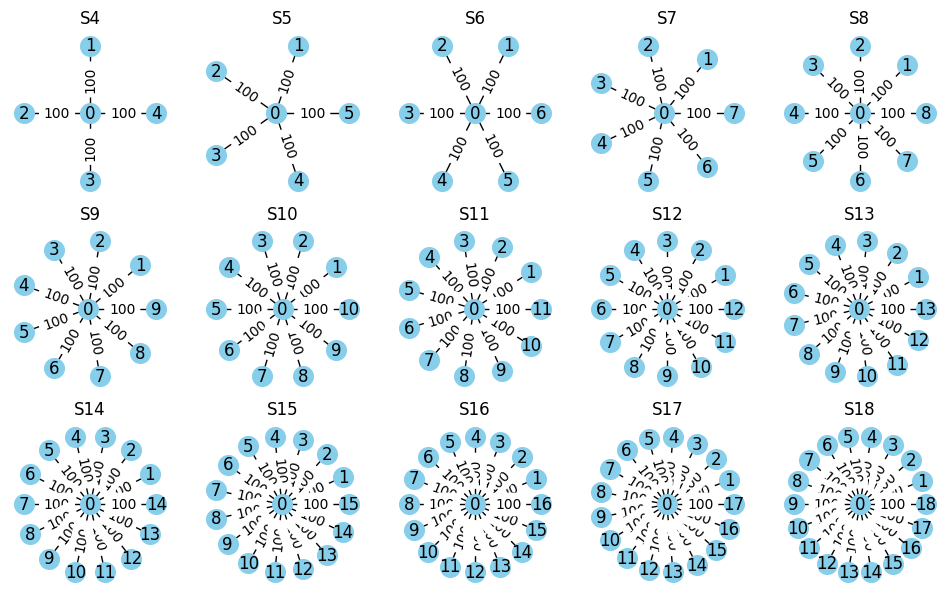

In [8]:
fig, axes = plt.subplots(3, 5, figsize=(12, 7.2))
axes = axes.flatten()
for i, graph in enumerate(star_graphs[:15]):
    pos = star_pos(len(graph.nodes))
    nx.draw(graph, pos=pos, with_labels=True, node_color='skyblue', node_size=200, font_size=12, ax=axes[i])
    nx.draw_networkx_edge_labels(graph, pos=pos, edge_labels={(u, v): f'{d["weight"]:.0f}' for u, v, d in graph.edges(data=True)}, ax=axes[i])
    axes[i].set_title(f"S{4 + i}")
plt.show()

#### Wheel graphs

In [9]:
# Function to add Euclidean distance as weights based on regular polygon positions
def add_euclidean_weights_wheel(graph):
    n = len(graph.nodes())
    pos = star_pos(n)
    # Calculate Euclidean distance between nodes and set as edge weights
    for u, v in graph.edges():
        dist = np.linalg.norm(pos[u] - pos[v])
        graph.edges[u, v]['weight'] = dist
    return graph, pos

# Create a dictionary to store wheel graphs W4 to W30
wheel_graphs_unw = {}

# Generate and store the wheel graphs
for n in range(4, 31):
    wheel_graphs_unw[f'W{n}'] = nx.wheel_graph(n)

# Initialize an empty list to store the scaled weighted wheel graphs
wheel_graphs = []

# Generate weights and scale for each wheel graph
for n in range(4, 30+1):
    weighted_graph, pos = add_euclidean_weights_wheel(wheel_graphs_unw[f'W{n}'])
    scaled_graph = scale_weights(weighted_graph)
    wheel_graphs.append(scaled_graph)

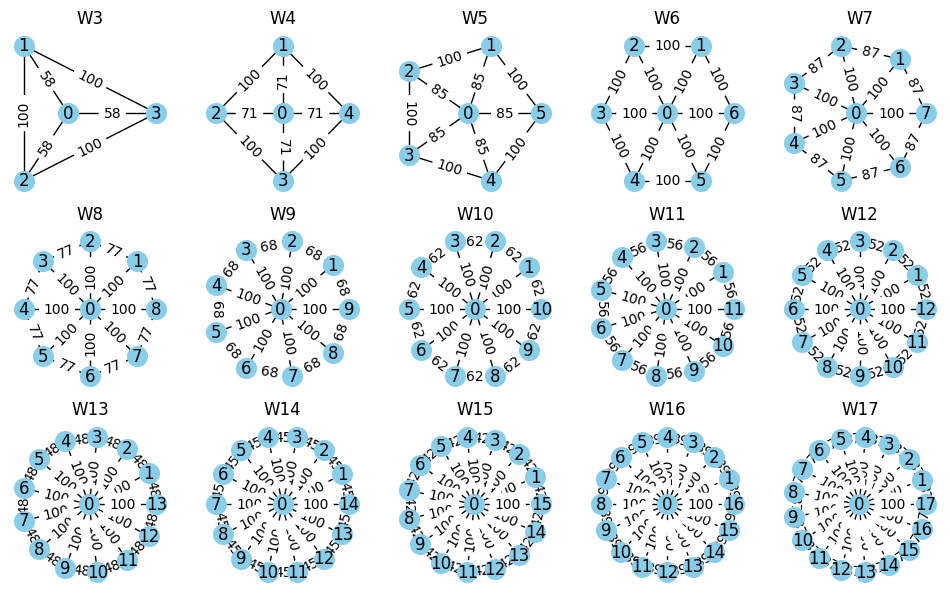

In [10]:

fig, axes = plt.subplots(3, 5, figsize=(12, 7.2))
axes = axes.flatten()
for i, graph in enumerate(wheel_graphs[:15]):
    pos = star_pos(len(graph.nodes))
    nx.draw(graph, pos=pos, with_labels=True, node_color='skyblue', node_size=200, font_size=12, ax=axes[i])
    nx.draw_networkx_edge_labels(graph, pos=pos, edge_labels={(u, v): f'{d["weight"]:.0f}' for u, v, d in graph.edges(data=True)}, ax=axes[i])
    axes[i].set_title(f"W{3 + i}")
plt.show()

#### Balanced tree

In [11]:
balanced_trees = []

for r in range(2,6):
    for h in range(4,7):
        b_tr = nx.balanced_tree(h,r)
        for u, v in b_tr.edges():
            b_tr.edges[u, v]['weight'] = 100
        balanced_trees.append(b_tr)

#### Complete multipartite graphs

In [12]:
cplt_MP_graphs = []
cmg_labels = []

for a in range(2,9):
    for b in range(1,9):
        for c in range(2,9):
            
            cmg = nx.complete_multipartite_graph(a,b,c)
            for u, v in cmg.edges():
                cmg.edges[u, v]['weight'] = 100
            cplt_MP_graphs.append(cmg)
            cmg_labels.append((a,b,c))

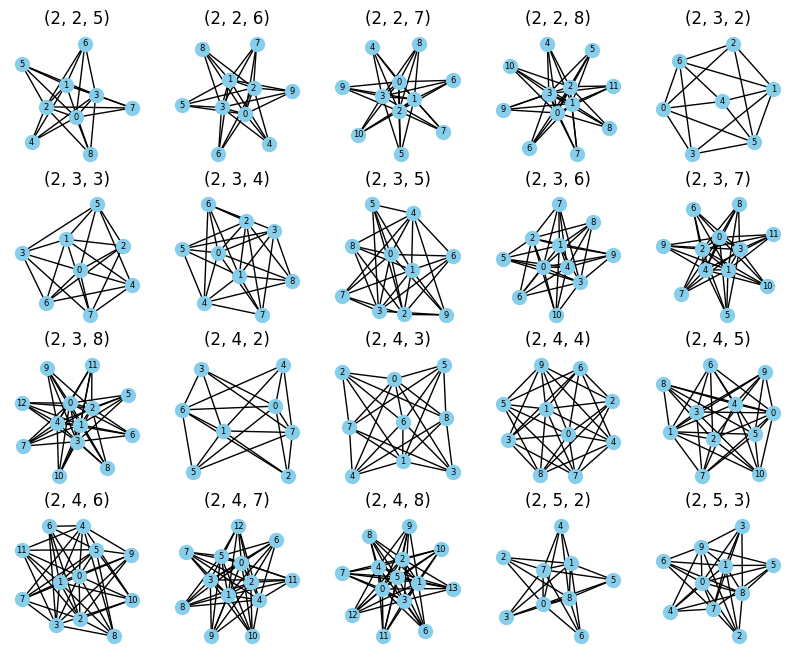

In [13]:
fig, axes = plt.subplots(4, 5, figsize=(10, 8))
axes = axes.flatten()
for i, graph in enumerate(cplt_MP_graphs[10:30]):
    nx.draw(graph, with_labels=True, node_color='skyblue', node_size=100, font_size=6, ax=axes[i])
    axes[i].set_title(f"{cmg_labels[10:][i]}")
plt.show()

#### Barbell graphs

In [14]:
barb_graphs = []
barb_labels = []

for barbsize in range(3,9):
    for bridge_len in range(0,3):
        # Create the two complete graphs (bells)
        bell1 = nx.complete_graph(barbsize)
        bell2 = nx.complete_graph(barbsize)

        # Add Euclidean weights and scale them for both bells
        bell1, pos_bell1 = add_euclidean_weights_regular_polygon(bell1)
        bell1 = scale_weights(bell1)
        bell2 = bell1.copy()

        mapping = {i: i+barbsize+bridge_len for i in bell2.nodes()}
        bell2 = nx.relabel_nodes(bell2, mapping)
        pos_bell2 = {i+barbsize+bridge_len:[pos_bell1[i][0]+5, pos_bell1[i][1]+5] for i in pos_bell1}


        # Create the bridge as a path graph
        bridge = nx.path_graph(bridge_len + 4)  # +2 to connect to the bells
        # Remove the first and last nodes (which are part of the bells)
        bridge.remove_nodes_from([0, bridge_len + 3])
        # Adjust node labels to continue from the last node of bell1
        mapping = {i: i+barbsize-2 for i in bridge.nodes()}
        bridge = nx.relabel_nodes(bridge, mapping)

        # Set bridge edge weights to 50
        for u, v in bridge.edges():
            bridge.edges[u, v]['weight'] = 150

        # Combine the two bells and the bridge into one graph
        barbell_graph = nx.compose(bell1, bridge)
        barbell_graph = nx.compose(barbell_graph, bell2)

        barb_graphs.append(barbell_graph)
        barb_labels.append((barbsize,bridge_len))

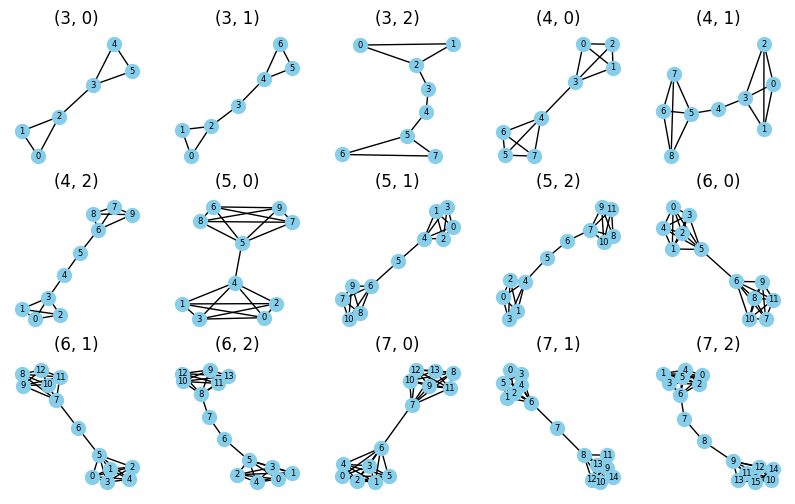

In [15]:
fig, axes = plt.subplots(3, 5, figsize=(10, 6))
axes = axes.flatten()
for i, graph in enumerate(barb_graphs[:15]):
    nx.draw(graph, with_labels=True, node_color='skyblue', node_size=100, font_size=6, ax=axes[i])
    axes[i].set_title(f"{barb_labels[i]}")
plt.show()

#### Caveman graph

In [16]:
caveman_graphs = []
caveman_labels = []

for cave_no in range(3,11):
    for size in range(4,11):
        
        caveman_graph = nx.Graph()

        for n in range(cave_no):
            cave = nx.complete_graph(size)
            cave, pos_cave = add_euclidean_weights_regular_polygon(cave)
            cave = scale_weights(cave)

            mapping = {i: size*n+i for i in cave.nodes()}
            cave = nx.relabel_nodes(cave, mapping)

            caveman_graph = nx.compose(cave, caveman_graph)

            if n != cave_no-1:
                caveman_graph.add_edge(size*n+1, size*(n+1), weight=100)
        
            caveman_graph.add_edge(size*(cave_no-1)+1, 0, weight=100)
            

        caveman_graphs.append(caveman_graph)
        caveman_labels.append((cave_no,size))

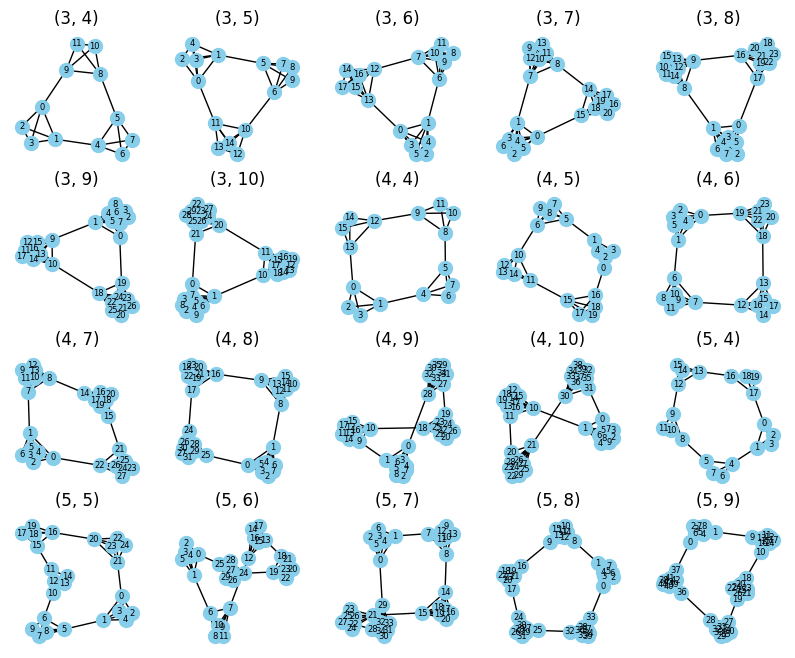

In [17]:
fig, axes = plt.subplots(4, 5, figsize=(10, 8))
axes = axes.flatten()
for i, graph in enumerate(caveman_graphs[:20]):
    nx.draw(graph, with_labels=True, node_color='skyblue', node_size=100, font_size=6, ax=axes[i])
    axes[i].set_title(f"{caveman_labels[i]}")
plt.show()

#### Grid graphs (square lattices)

In [18]:
square_lattice = []
grid_labels = []

for x in range(3,11):
    for y in range(3,11):            
        grid = nx.grid_2d_graph(x,y)
        for u, v in grid.edges():
            grid.edges[u, v]['weight'] = 100
        square_lattice.append(grid)
        grid_labels.append(f'{x}x{y}')

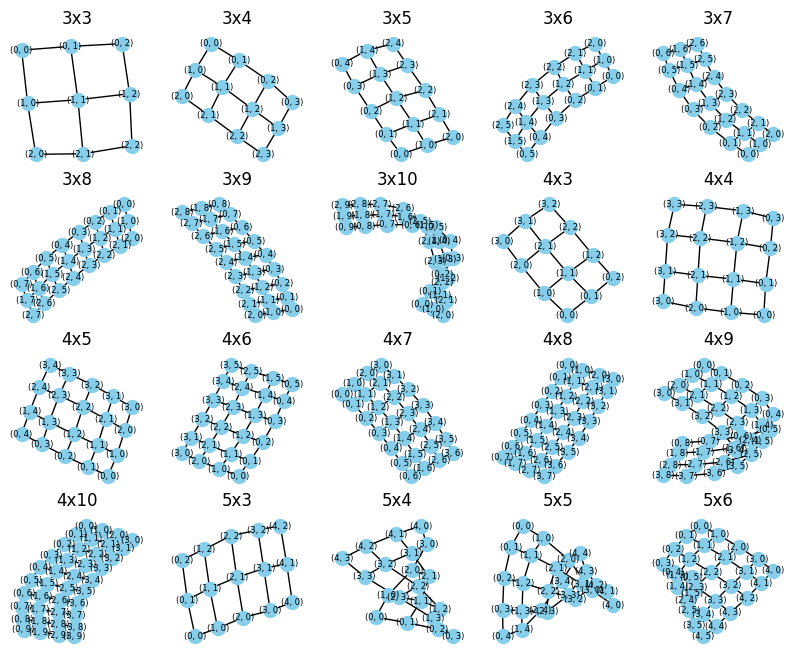

In [19]:
fig, axes = plt.subplots(4, 5, figsize=(10, 8))
axes = axes.flatten()
for i, graph in enumerate(square_lattice[:20]):
    nx.draw(graph, with_labels=True, node_color='skyblue', node_size=100, font_size=6, ax=axes[i])
    axes[i].set_title(f"{grid_labels[i]}")
plt.show()


#### Triangle lattices

In [20]:
triangle_lattice = []
triangle_labels = []

for x in range(3,11):
    for y in range(3,11):            
        tri = nx.triangular_lattice_graph(x,y)
        for u, v in tri.edges():
            tri.edges[u, v]['weight'] = 100
        triangle_lattice.append(tri)
        triangle_labels.append(f'{x}x{y}')

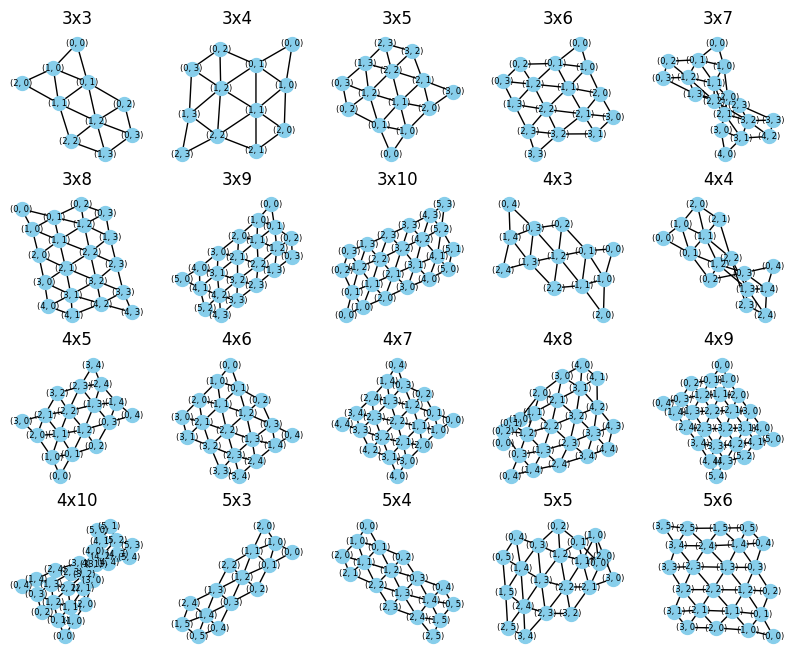

In [21]:
fig, axes = plt.subplots(4, 5, figsize=(10, 8))
axes = axes.flatten()
for i, graph in enumerate(triangle_lattice[:20]):
    nx.draw(graph, with_labels=True, node_color='skyblue', node_size=100, font_size=6, ax=axes[i])
    axes[i].set_title(f"{triangle_labels[i]}")
plt.show()

#### Hexagonal lattices

In [22]:
hexag_lattice = []
hexag_labels = []

for x in range(3,11):
    for y in range(3,11):            
        hex = nx.hexagonal_lattice_graph(x,y)
        for u, v in hex.edges():
            hex.edges[u, v]['weight'] = 100
        hexag_lattice.append(hex)
        hexag_labels.append(f'{x}x{y}')

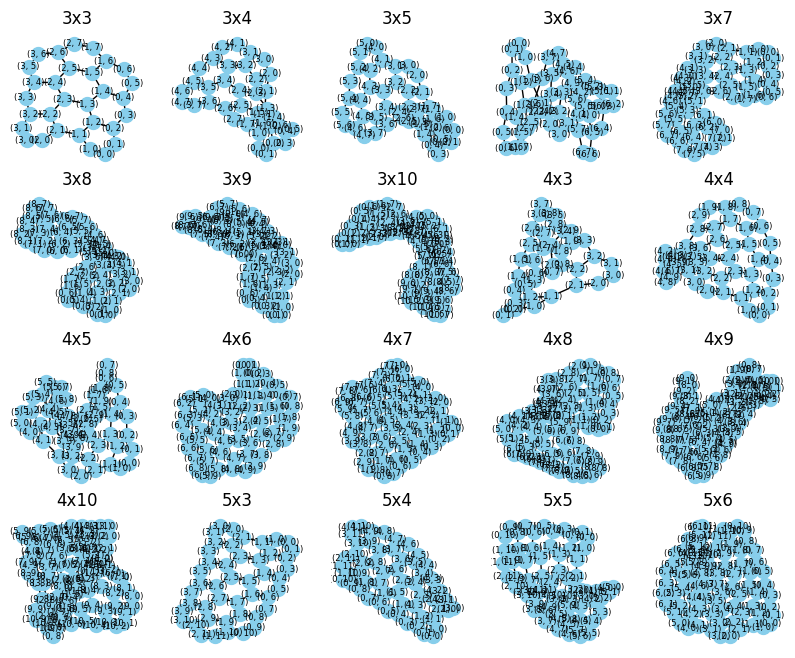

In [23]:
fig, axes = plt.subplots(4, 5, figsize=(10, 8))
axes = axes.flatten()
for i, graph in enumerate(hexag_lattice[:20]):
    nx.draw(graph, with_labels=True, node_color='skyblue', node_size=100, font_size=6, ax=axes[i])
    axes[i].set_title(f"{hexag_labels[i]}")
plt.show()

### Attributes

In [24]:
graph_types_str = ['complete_graphs',
                'star_graphs',
                'wheel_graphs',
                'balanced_trees',
                'cplt_MP_graphs',
                'barb_graphs',
                'caveman_graphs',
                'square_lattice',
                'triangle_lattice',
                'hexag_lattice']

graph_types = [complete_graphs,
                star_graphs,
                wheel_graphs,
                balanced_trees,
                cplt_MP_graphs,
                barb_graphs,
                caveman_graphs,
                square_lattice,
                triangle_lattice,
                hexag_lattice]

graph_types_dict = {}

for i in range(len(graph_types_str)):
    graph_types_dict[graph_types_str[i]] = graph_types[i]

In [35]:
graph_attributes_dict = {}

for G_type in graph_types_str:
    if G_type == 'balanced_trees':
        continue

    G_list = graph_types_dict[G_type]

    topo_attributes_dict = [{} for _ in range(len(G_list))]

    # in general, unweighed is in terms of hops, weighed is in terms of distance
    for i in range(len(G_list)):
    
        topo_attributes_dict[i]['nodes'] = G_list[i].number_of_nodes()
        topo_attributes_dict[i]['edges'] = G_list[i].number_of_edges()
        topo_attributes_dict[i]['density'] = nx.density(G_list[i]) # existing edges / potential edges

        topo_attributes_dict[i]['diameter_hops'] = nx.diameter(G_list[i]) # max eccentricity
        topo_attributes_dict[i]['diameter_km'] = nx.diameter(G_list[i], weight='weight') # max eccentricity
        
        topo_attributes_dict[i]['radius_hops'] = nx.radius(G_list[i]) # min eccentricity
        topo_attributes_dict[i]['radius_km'] = nx.radius(G_list[i], weight='weight') # min eccentricity

        node_degs = [G_list[i].degree(node) for node in G_list[i].nodes()]
        topo_attributes_dict[i]['avg_node_deg'] = np.mean(node_degs)
        topo_attributes_dict[i]['avg_node_deg_norm'] = np.mean(node_degs)/G_list[i].number_of_nodes()
        topo_attributes_dict[i]['std_node_deg'] = np.std(node_degs)

        edge_betw_centrality_list = list(nx.edge_betweenness_centrality(G_list[i], weight='weight').values())
        topo_attributes_dict[i]['max_edge_betw_centr_km'] = max(edge_betw_centrality_list)
        topo_attributes_dict[i]['avg_edge_betw_centr_km'] = np.mean(edge_betw_centrality_list)

        node_betw_centrality_list = list(nx.betweenness_centrality(G_list[i], weight='weight').values())
        topo_attributes_dict[i]['max_node_betw_centr_km'] = max(node_betw_centrality_list)
        topo_attributes_dict[i]['avg_node_betw_centr_km'] = np.mean(node_betw_centrality_list)
        
        # load is same as betweenness centr
        #load_centrality_list = list(nx.load_centrality(G_list[i], weight='weight').values())
        #topo_attributes_dict[i]['max_load_centr_km'] = max(load_centrality_list)
        #topo_attributes_dict[i]['avg_load_centr_km'] = np.mean(load_centrality_list)

        closeness_centrality_list = list(nx.closeness_centrality(G_list[i]).values())
        topo_attributes_dict[i]['max_closen_centr'] = max(closeness_centrality_list)
        topo_attributes_dict[i]['avg_closen_centr'] = np.mean(closeness_centrality_list)

        deg_centrality_list = list(nx.degree_centrality(G_list[i]).values())
        topo_attributes_dict[i]['max_deg_centr'] = max(deg_centrality_list)
        topo_attributes_dict[i]['avg_deg_centr'] = np.mean(deg_centrality_list)

        harmo_centrality_list = list(nx.harmonic_centrality(G_list[i]).values())
        topo_attributes_dict[i]['max_harmo_centr'] = max(harmo_centrality_list)
        topo_attributes_dict[i]['avg_harmo_centr'] = np.mean(harmo_centrality_list)
        
        lapl_centrality_list = list(nx.laplacian_centrality(G_list[i], weight='weight').values())
        topo_attributes_dict[i]['max_lapl_centr_km'] = max(lapl_centrality_list)
        topo_attributes_dict[i]['avg_lapl_centr_km'] = np.mean(lapl_centrality_list)

        
        unw_cluster_coeff_list = list(nx.clustering(G_list[i]).values())
        topo_attributes_dict[i]['avg_cluster_coeff_hops'] = np.mean(unw_cluster_coeff_list)
        w_cluster_coeff_list = list(nx.clustering(G_list[i], weight='weight').values())
        topo_attributes_dict[i]['avg_cluster_coeff_km'] = np.mean(w_cluster_coeff_list)
        
        topo_attributes_dict[i]['avg_local_eff'] = nx.local_efficiency(G_list[i])
        topo_attributes_dict[i]['avg_global_eff'] = nx.global_efficiency(G_list[i])
        topo_attributes_dict[i]['connectivity'] = nx.node_connectivity(G_list[i])
        topo_attributes_dict[i]['avg_deg_connectivity'] = nx.average_degree_connectivity(G_list[i])
        topo_attributes_dict[i]['deg_assortativity'] = nx.degree_assortativity_coefficient(G_list[i])

        topo_attributes_dict[i]['avg_shortest_path_len_hops'] = nx.average_shortest_path_length(G_list[i])
        topo_attributes_dict[i]['avg_shortest_path_len_km'] = nx.average_shortest_path_length(G_list[i], weight='weight')

        shortest_pairs_nest = dict(nx.all_pairs_dijkstra_path_length(G_list[i], weight='weight'))
        shortest_pairs_combine = {}
        for d in shortest_pairs_nest:
            for v in shortest_pairs_nest[d]:
                shortest_pairs_combine[(d,v)] = shortest_pairs_nest[d][v]
        topo_attributes_dict[i]['std_shortest_path_len_km'] = np.std(list(shortest_pairs_combine.values()))
        
        adj_spect = nx.adjacency_spectrum(G_list[i], weight='weight')
        topo_attributes_dict[i]['spect_radius'] = np.real(max(adj_spect))

        lapl_spect = nx.laplacian_spectrum(G_list[i], weight='weight')
        lapl_spect = np.sort(lapl_spect)
        topo_attributes_dict[i]['spect_gap'] = np.real(lapl_spect[-1]-lapl_spect[-2])
        topo_attributes_dict[i]['alg_conn'] = np.real(lapl_spect[1])
        #topo_attributes_dict[i]['alg_conn'] = nx.algebraic_connectivity(G_list[i]) # weight doesnt change value
        
        norm_lapl_spect = nx.normalized_laplacian_spectrum(G_list[i], weight='weight')
        topo_attributes_dict[i]['WSD_3'] = sum([(1-eigval)**3 for eigval in norm_lapl_spect])
        topo_attributes_dict[i]['WSD_4'] = sum([(1-eigval)**4 for eigval in norm_lapl_spect])

        topo_attributes_dict[i]['kem_const'] = nx.kemeny_constant(G_list[i], weight='weight')


        edge_lens = (data['weight'] for u, v, data in G_list[i].edges(data=True))
        edge_lens = sorted(edge_lens)
        topo_attributes_dict[i]['avg_edge_km'] = np.mean(edge_lens)
        topo_attributes_dict[i]['std_edge_km'] = np.std(edge_lens)
        topo_attributes_dict[i]['diff_mean&secondlargest_edge_km'] = edge_lens[-2]-np.mean(edge_lens)

        topo_attributes_dict[i]['mean_longest_4_edges_len'] = np.mean(edge_lens[-4:])
        topo_attributes_dict[i]['second_longest_edge'] = edge_lens[-2]
        

        topo_attributes_dict[i]['frac_edges>90'] = sum(1 for e in edge_lens if e > 90) / len(edge_lens)
        topo_attributes_dict[i]['frac_edges>80'] = sum(1 for e in edge_lens if e > 80) / len(edge_lens)
        topo_attributes_dict[i]['frac_edges>50'] = sum(1 for e in edge_lens if e > 50) / len(edge_lens)
        topo_attributes_dict[i]['frac_edges<10'] = sum(1 for e in edge_lens if e < 10) / len(edge_lens)
        topo_attributes_dict[i]['frac_edges<20'] = sum(1 for e in edge_lens if e < 20) / len(edge_lens)


    print(f'{G_type} complete')

    topo_attributes_df = pd.DataFrame(topo_attributes_dict)

    graph_attributes_dict[G_type] = topo_attributes_df

C:\Users\jazzo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\networkx\algorithms\assortativity\correlation.py:302: RuntimeWarning: invalid value encountered in scalar divide
  return float((xy * (M - ab)).sum() / np.sqrt(vara * varb))


complete_graphs complete
star_graphs complete
wheel_graphs complete
cplt_MP_graphs complete
barb_graphs complete
caveman_graphs complete
square_lattice complete
triangle_lattice complete
hexag_lattice complete


In [32]:
for G_type in graph_attributes_dict:
    display(graph_attributes_dict[G_type])

,avg_node_deg,avg_node_deg_norm,std_node_deg,max_edge_betw_centr_km,avg_edge_betw_centr_km,max_node_betw_centr_km,avg_node_betw_centr_km,max_closen_centr,avg_closen_centr,max_deg_centr,...,avg_edge_km,std_edge_km,diff_mean&secondlargest_edge_km,mean_longest_4_edges_len,second_longest_edge,frac_edges>90,frac_edges>80,frac_edges>50,frac_edges<10,frac_edges<20
0,3.0,0.750000,0.0,0.166667,0.166667,0.0,0.0,1.0,1.0,1.0,...,80.473785,13.807119,19.526215,85.355339,100.0,0.333333,0.333333,1.000000,0.0,0.000000
1,4.0,0.800000,0.0,0.100000,0.100000,0.0,0.0,1.0,1.0,1.0,...,80.901699,19.098301,19.098301,100.000000,100.0,0.500000,0.500000,1.000000,0.0,0.000000
2,5.0,0.833333,0.0,0.066667,0.066667,0.0,0.0,1.0,1.0,1.0,...,74.641016,20.705524,25.358984,96.650635,100.0,0.200000,0.600000,0.666667,0.0,0.000000
3,6.0,0.857143,0.0,0.047619,0.047619,0.0,0.0,1.0,1.0,1.0,...,74.899320,22.963300,25.100680,100.000000,100.0,0.333333,0.666667,0.666667,0.0,0.000000
4,7.0,0.875000,0.0,0.035714,0.035714,0.0,0.0,1.0,1.0,1.0,...,71.819136,23.585959,28.180864,100.000000,100.0,0.428571,0.428571,0.714286,0.0,0.000000
5,8.0,0.888889,0.0,0.027778,0.027778,0.0,0.0,1.0,1.0,1.0,...,71.984631,24.861635,28.015369,100.000000,100.0,0.250000,0.500000,0.750000,0.0,0.000000
6,9.0,0.900000,0.0,0.022222,0.022222,0.0,0.0,1.0,1.0,1.0,...,70.152795,25.182156,29.847205,100.000000,100.0,0.333333,0.555556,0.777778,0.0,0.000000
7,10.0,0.909091,0.0,0.018182,0.018182,0.0,0.0,1.0,1.0,1.0,...,70.266742,26.005424,29.733258,100.000000,100.0,0.400000,0.400000,0.800000,0.0,0.000000
8,11.0,0.916667,0.0,0.015152,0.015152,0.0,0.0,1.0,1.0,1.0,...,69.052310,26.197785,30.947690,100.000000,100.0,0.272727,0.454545,0.666667,0.0,0.000000
9,12.0,0.923077,0.0,0.012821,0.012821,0.0,0.0,1.0,1.0,1.0,...,69.135248,26.773936,30.864752,100.000000,100.0,0.333333,0.500000,0.666667,0.0,0.000000


,avg_node_deg,avg_node_deg_norm,std_node_deg,max_edge_betw_centr_km,avg_edge_betw_centr_km,max_node_betw_centr_km,avg_node_betw_centr_km,max_closen_centr,avg_closen_centr,max_deg_centr,...,avg_edge_km,std_edge_km,diff_mean&secondlargest_edge_km,mean_longest_4_edges_len,second_longest_edge,frac_edges>90,frac_edges>80,frac_edges>50,frac_edges<10,frac_edges<20
0,1.600000,0.320000,1.200000,0.400000,0.400000,1.0,0.200000,1.0,0.657143,1.0,...,100.0,0.0,0.0,100.0,100,1.0,1.0,1.0,0.0,0.0
1,1.666667,0.277778,1.490712,0.333333,0.333333,1.0,0.166667,1.0,0.629630,1.0,...,100.0,0.0,0.0,100.0,100,1.0,1.0,1.0,0.0,0.0
2,1.714286,0.244898,1.749636,0.285714,0.285714,1.0,0.142857,1.0,0.610390,1.0,...,100.0,0.0,0.0,100.0,100,1.0,1.0,1.0,0.0,0.0
3,1.750000,0.218750,1.984313,0.250000,0.250000,1.0,0.125000,1.0,0.596154,1.0,...,100.0,0.0,0.0,100.0,100,1.0,1.0,1.0,0.0,0.0
4,1.777778,0.197531,2.199888,0.222222,0.222222,1.0,0.111111,1.0,0.585185,1.0,...,100.0,0.0,0.0,100.0,100,1.0,1.0,1.0,0.0,0.0
5,1.800000,0.180000,2.400000,0.200000,0.200000,1.0,0.100000,1.0,0.576471,1.0,...,100.0,0.0,0.0,100.0,100,1.0,1.0,1.0,0.0,0.0
6,1.818182,0.165289,2.587318,0.181818,0.181818,1.0,0.090909,1.0,0.569378,1.0,...,100.0,0.0,0.0,100.0,100,1.0,1.0,1.0,0.0,0.0
7,1.833333,0.152778,2.763854,0.166667,0.166667,1.0,0.083333,1.0,0.563492,1.0,...,100.0,0.0,0.0,100.0,100,1.0,1.0,1.0,0.0,0.0
8,1.846154,0.142012,2.931163,0.153846,0.153846,1.0,0.076923,1.0,0.558528,1.0,...,100.0,0.0,0.0,100.0,100,1.0,1.0,1.0,0.0,0.0
9,1.857143,0.132653,3.090473,0.142857,0.142857,1.0,0.071429,1.0,0.554286,1.0,...,100.0,0.0,0.0,100.0,100,1.0,1.0,1.0,0.0,0.0


,avg_node_deg,avg_node_deg_norm,std_node_deg,max_edge_betw_centr_km,avg_edge_betw_centr_km,max_node_betw_centr_km,avg_node_betw_centr_km,max_closen_centr,avg_closen_centr,max_deg_centr,...,avg_edge_km,std_edge_km,diff_mean&secondlargest_edge_km,mean_longest_4_edges_len,second_longest_edge,frac_edges>90,frac_edges>80,frac_edges>50,frac_edges<10,frac_edges<20
0,3.000000,0.750000,0.000000,0.166667,0.166667,0.000000,0.000000,1.0,1.000000,1.0,...,78.867513,2.113249e+01,21.132487,89.433757,100.0,0.5,0.5,1.0,0.0,0.0
1,3.200000,0.640000,0.400000,0.200000,0.150000,0.333333,0.066667,1.0,0.840000,1.0,...,85.355339,1.464466e+01,14.644661,100.000000,100.0,0.5,0.5,1.0,0.0,0.0
2,3.333333,0.555556,0.745356,0.200000,0.133333,0.500000,0.083333,1.0,0.761905,1.0,...,92.532540,7.467460e+00,7.467460,100.000000,100.0,0.5,1.0,1.0,0.0,0.0
3,3.428571,0.489796,1.049781,0.166667,0.119048,0.400000,0.085714,1.0,0.714286,1.0,...,100.000000,1.788160e-14,0.000000,100.000000,100.0,1.0,1.0,1.0,0.0,0.0
4,3.500000,0.437500,1.322876,0.107143,0.107143,0.333333,0.083333,1.0,0.681818,1.0,...,93.388374,6.611626e+00,6.611626,100.000000,100.0,0.5,1.0,1.0,0.0,0.0
5,3.555556,0.395062,1.571348,0.111111,0.097222,0.428571,0.079365,1.0,0.658120,1.0,...,88.268343,1.173166e+01,11.731657,100.000000,100.0,0.5,0.5,1.0,0.0,0.0
6,3.600000,0.360000,1.800000,0.111111,0.088889,0.500000,0.075000,1.0,0.640000,1.0,...,84.202014,1.579799e+01,15.797986,100.000000,100.0,0.5,0.5,1.0,0.0,0.0
7,3.636364,0.330579,2.012359,0.109091,0.090909,0.333333,0.090909,1.0,0.625668,1.0,...,80.901699,1.909830e+01,19.098301,100.000000,100.0,0.5,0.5,1.0,0.0,0.0
8,3.666667,0.305556,2.211083,0.090909,0.083333,0.400000,0.083333,1.0,0.614035,1.0,...,78.173256,2.182674e+01,21.826744,100.000000,100.0,0.5,0.5,1.0,0.0,0.0
9,3.692308,0.284024,2.398224,0.076923,0.076923,0.454545,0.076923,1.0,0.604396,1.0,...,75.881905,2.411810e+01,24.118095,100.000000,100.0,0.5,0.5,1.0,0.0,0.0


,avg_node_deg,avg_node_deg_norm,std_node_deg,max_edge_betw_centr_km,avg_edge_betw_centr_km,max_node_betw_centr_km,avg_node_betw_centr_km,max_closen_centr,avg_closen_centr,max_deg_centr,...,avg_edge_km,std_edge_km,diff_mean&secondlargest_edge_km,mean_longest_4_edges_len,second_longest_edge,frac_edges>90,frac_edges>80,frac_edges>50,frac_edges<10,frac_edges<20
0,3.200000,0.640000,0.400000,0.166667,0.150000,0.111111,0.066667,1.000000,0.840000,1.000000,...,100.0,0.0,0.0,100.0,100,1.0,1.0,1.0,0.0,0.0
1,3.666667,0.611111,0.745356,0.127778,0.115152,0.125000,0.066667,1.000000,0.801587,1.000000,...,100.0,0.0,0.0,100.0,100,1.0,1.0,1.0,0.0,0.0
2,4.000000,0.571429,1.195229,0.104762,0.095238,0.146667,0.066667,1.000000,0.768707,1.000000,...,100.0,0.0,0.0,100.0,100,1.0,1.0,1.0,0.0,0.0
3,4.250000,0.531250,1.639360,0.089286,0.081933,0.166667,0.065476,1.000000,0.741477,1.000000,...,100.0,0.0,0.0,100.0,100,1.0,1.0,1.0,0.0,0.0
4,4.444444,0.493827,2.060804,0.078042,0.072222,0.183673,0.063492,1.000000,0.718898,1.000000,...,100.0,0.0,0.0,100.0,100,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,12.800000,0.640000,1.600000,0.011404,0.010362,0.027290,0.018129,0.863636,0.757343,0.842105,...,100.0,0.0,0.0,100.0,100,1.0,1.0,1.0,0.0,0.0
388,13.714286,0.653061,1.277753,0.009890,0.009127,0.022672,0.016541,0.833333,0.762787,0.800000,...,100.0,0.0,0.0,100.0,100,1.0,1.0,1.0,0.0,0.0
389,14.545455,0.661157,0.890724,0.008658,0.008171,0.019048,0.015368,0.807692,0.765734,0.761905,...,100.0,0.0,0.0,100.0,100,1.0,1.0,1.0,0.0,0.0
390,15.304348,0.665406,0.460131,0.007642,0.007411,0.016162,0.014493,0.785714,0.766867,0.727273,...,100.0,0.0,0.0,100.0,100,1.0,1.0,1.0,0.0,0.0


,avg_node_deg,avg_node_deg_norm,std_node_deg,max_edge_betw_centr_km,avg_edge_betw_centr_km,max_node_betw_centr_km,avg_node_betw_centr_km,max_closen_centr,avg_closen_centr,max_deg_centr,...,avg_edge_km,std_edge_km,diff_mean&secondlargest_edge_km,mean_longest_4_edges_len,second_longest_edge,frac_edges>90,frac_edges>80,frac_edges>50,frac_edges<10,frac_edges<20
0,2.333333,0.388889,0.471405,0.600000,0.257143,0.600000,0.200000,0.714286,0.571429,0.600000,...,107.142857,17.496355,-7.142857,112.5,100.0,1.000000,1.000000,1.000000,0.0,0.0
1,2.285714,0.326531,0.451754,0.571429,0.273810,0.600000,0.238095,0.600000,0.470130,0.500000,...,112.500000,21.650635,37.500000,125.0,150.0,1.000000,1.000000,1.000000,0.0,0.0
2,2.250000,0.281250,0.433013,0.571429,0.285714,0.571429,0.261905,0.500000,0.401042,0.428571,...,116.666667,23.570226,33.333333,137.5,150.0,1.000000,1.000000,1.000000,0.0,0.0
3,3.250000,0.406250,0.433013,0.571429,0.142857,0.571429,0.142857,0.700000,0.550000,0.571429,...,85.821956,22.786121,14.178044,112.5,100.0,0.384615,0.384615,1.000000,0.0,0.0
4,3.111111,0.345679,0.566558,0.555556,0.162698,0.571429,0.182540,0.571429,0.448677,0.500000,...,90.406102,27.482871,59.593898,125.0,150.0,0.428571,0.428571,1.000000,0.0,0.0
5,3.000000,0.300000,0.632456,0.555556,0.179259,0.555556,0.211111,0.473684,0.380451,0.444444,...,94.379028,30.429136,55.620972,137.5,150.0,0.466667,0.466667,1.000000,0.0,0.0
6,4.200000,0.420000,0.400000,0.555556,0.089947,0.555556,0.111111,0.692308,0.538462,0.555556,...,84.192095,23.746795,15.807905,112.5,100.0,0.523810,0.523810,1.000000,0.0,0.0
7,4.000000,0.363636,0.738549,0.545455,0.105785,0.555556,0.147475,0.555556,0.437108,0.500000,...,87.183363,26.947717,62.816637,125.0,150.0,0.545455,0.545455,1.000000,0.0,0.0
8,3.833333,0.319444,0.897527,0.545455,0.119895,0.545455,0.175758,0.458333,0.369124,0.454545,...,89.914521,29.303743,60.085479,137.5,150.0,0.565217,0.565217,1.000000,0.0,0.0
9,5.166667,0.430556,0.372678,0.545455,0.061584,0.545455,0.090909,0.687500,0.531250,0.545455,...,77.071951,24.334593,22.928049,112.5,100.0,0.225806,0.612903,0.677419,0.0,0.0


,avg_node_deg,avg_node_deg_norm,std_node_deg,max_edge_betw_centr_km,avg_edge_betw_centr_km,max_node_betw_centr_km,avg_node_betw_centr_km,max_closen_centr,avg_closen_centr,max_deg_centr,...,avg_edge_km,std_edge_km,diff_mean&secondlargest_edge_km,mean_longest_4_edges_len,second_longest_edge,frac_edges>90,frac_edges>80,frac_edges>50,frac_edges<10,frac_edges<20
0,3.500000,0.291667,0.500000,0.242424,0.099567,0.218182,0.109091,0.523810,0.481905,0.363636,...,83.263245,14.494455,16.736755,100.0,100.0,0.428571,0.428571,1.000000,0.0,0.0
1,4.400000,0.293333,0.489898,0.238095,0.064935,0.219780,0.087912,0.518519,0.469907,0.357143,...,82.637909,19.019218,17.362091,100.0,100.0,0.545455,0.545455,1.000000,0.0,0.0
2,5.333333,0.296296,0.471405,0.235294,0.045343,0.220588,0.073529,0.515152,0.462315,0.352941,...,76.225953,20.966739,23.774047,100.0,100.0,0.250000,0.625000,0.687500,0.0,0.0
3,6.285714,0.299320,0.451754,0.233333,0.033333,0.221053,0.063158,0.512821,0.457079,0.350000,...,76.040260,23.036515,23.959740,100.0,100.0,0.363636,0.681818,0.681818,0.0,0.0
4,7.250000,0.302083,0.433013,0.231884,0.025487,0.221344,0.055336,0.511111,0.453249,0.347826,...,72.790890,23.739321,27.209110,100.0,100.0,0.448276,0.448276,0.724138,0.0,0.0
5,8.222222,0.304527,0.415740,0.230769,0.020097,0.221538,0.049231,0.509804,0.450327,0.346154,...,72.741803,24.940622,27.258197,100.0,100.0,0.270270,0.513514,0.756757,0.0,0.0
6,9.200000,0.306667,0.400000,0.229885,0.016242,0.221675,0.044335,0.508772,0.448023,0.344828,...,70.801647,25.284397,29.198353,100.0,100.0,0.347826,0.565217,0.782609,0.0,0.0
7,3.500000,0.218750,0.500000,0.266667,0.094048,0.233333,0.116667,0.416667,0.382752,0.266667,...,83.263245,14.494455,16.736755,100.0,100.0,0.428571,0.428571,1.000000,0.0,0.0
8,4.400000,0.220000,0.489898,0.263158,0.061483,0.236842,0.094737,0.413043,0.372490,0.263158,...,82.637909,19.019218,17.362091,100.0,100.0,0.545455,0.545455,1.000000,0.0,0.0
9,5.333333,0.222222,0.471405,0.260870,0.043025,0.239130,0.079710,0.410714,0.365760,0.260870,...,76.225953,20.966739,23.774047,100.0,100.0,0.250000,0.625000,0.687500,0.0,0.0


,avg_node_deg,avg_node_deg_norm,std_node_deg,max_edge_betw_centr_km,avg_edge_betw_centr_km,max_node_betw_centr_km,avg_node_betw_centr_km,max_closen_centr,avg_closen_centr,max_deg_centr,...,avg_edge_km,std_edge_km,diff_mean&secondlargest_edge_km,mean_longest_4_edges_len,second_longest_edge,frac_edges>90,frac_edges>80,frac_edges>50,frac_edges<10,frac_edges<20
0,2.666667,0.296296,0.666667,0.203704,0.166667,0.380952,0.142857,0.666667,0.508642,0.500000,...,100.0,0.0,0.0,100.0,100,1.0,1.0,1.0,0.0,0.0
1,2.833333,0.236111,0.687184,0.224242,0.137255,0.309697,0.133333,0.550000,0.437179,0.363636,...,100.0,0.0,0.0,100.0,100,1.0,1.0,1.0,0.0,0.0
2,2.933333,0.195556,0.679869,0.211429,0.121212,0.307692,0.128205,0.500000,0.383447,0.285714,...,100.0,0.0,0.0,100.0,100,1.0,1.0,1.0,0.0,0.0
3,3.000000,0.166667,0.666667,0.218674,0.111111,0.281197,0.125000,0.435897,0.341536,0.235294,...,100.0,0.0,0.0,100.0,100,1.0,1.0,1.0,0.0,0.0
4,3.047619,0.145125,0.652919,0.212426,0.104167,0.278496,0.122807,0.400000,0.307917,0.200000,...,100.0,0.0,0.0,100.0,100,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,3.466667,0.057778,0.618241,0.110529,0.051282,0.161224,0.074713,0.245833,0.192220,0.067797,...,100.0,0.0,0.0,100.0,100,1.0,1.0,1.0,0.0,0.0
60,3.514286,0.050204,0.603392,0.097564,0.046070,0.152552,0.068627,0.233898,0.180804,0.057971,...,100.0,0.0,0.0,100.0,100,1.0,1.0,1.0,0.0,0.0
61,3.550000,0.044375,0.589491,0.084871,0.042254,0.140266,0.064103,0.219444,0.170702,0.050633,...,100.0,0.0,0.0,100.0,100,1.0,1.0,1.0,0.0,0.0
62,3.577778,0.039753,0.576922,0.076771,0.039337,0.134700,0.060606,0.209412,0.161696,0.044944,...,100.0,0.0,0.0,100.0,100,1.0,1.0,1.0,0.0,0.0


,avg_node_deg,avg_node_deg_norm,std_node_deg,max_edge_betw_centr_km,avg_edge_betw_centr_km,max_node_betw_centr_km,avg_node_betw_centr_km,max_closen_centr,avg_closen_centr,max_deg_centr,...,avg_edge_km,std_edge_km,diff_mean&secondlargest_edge_km,mean_longest_4_edges_len,second_longest_edge,frac_edges>90,frac_edges>80,frac_edges>50,frac_edges<10,frac_edges<20
0,3.600000,0.360000,1.280625,0.155556,0.098765,0.305556,0.097222,0.750000,0.576948,0.666667,...,100.0,0.0,0.0,100.0,100,1.0,1.0,1.0,0.0,0.0
1,3.833333,0.319444,1.343710,0.123737,0.083004,0.254545,0.090909,0.687500,0.537293,0.545455,...,100.0,0.0,0.0,100.0,100,1.0,1.0,1.0,0.0,0.0
2,4.000000,0.285714,1.362770,0.104396,0.072998,0.235043,0.086996,0.650000,0.501609,0.461538,...,100.0,0.0,0.0,100.0,100,1.0,1.0,1.0,0.0,0.0
3,4.125000,0.257812,1.363589,0.105833,0.066414,0.219206,0.085119,0.600000,0.468225,0.400000,...,100.0,0.0,0.0,100.0,100,1.0,1.0,1.0,0.0,0.0
4,4.222222,0.234568,1.356284,0.109150,0.061576,0.215441,0.083742,0.566667,0.438729,0.352941,...,100.0,0.0,0.0,100.0,100,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,4.681818,0.106405,1.344564,0.094598,0.040046,0.188330,0.074398,0.330769,0.250909,0.139535,...,100.0,0.0,0.0,100.0,100,1.0,1.0,1.0,0.0,0.0
60,4.760000,0.095200,1.364698,0.081789,0.035754,0.165024,0.067806,0.318182,0.242884,0.122449,...,100.0,0.0,0.0,100.0,100,1.0,1.0,1.0,0.0,0.0
61,4.872727,0.088595,1.308080,0.075166,0.032223,0.156122,0.062601,0.317647,0.238814,0.111111,...,100.0,0.0,0.0,100.0,100,1.0,1.0,1.0,0.0,0.0
62,4.918033,0.080623,1.321885,0.068237,0.029734,0.146819,0.058646,0.309278,0.230981,0.100000,...,100.0,0.0,0.0,100.0,100,1.0,1.0,1.0,0.0,0.0


,avg_node_deg,avg_node_deg_norm,std_node_deg,max_edge_betw_centr_km,avg_edge_betw_centr_km,max_node_betw_centr_km,avg_node_betw_centr_km,max_closen_centr,avg_closen_centr,max_deg_centr,...,avg_edge_km,std_edge_km,diff_mean&secondlargest_edge_km,mean_longest_4_edges_len,second_longest_edge,frac_edges>90,frac_edges>80,frac_edges>50,frac_edges<10,frac_edges<20
0,2.533333,0.084444,0.498888,0.185824,0.108348,0.259770,0.111330,0.325843,0.248669,0.103448,...,100.0,0.0,0.0,100.0,100,1.0,1.0,1.0,0.0,0.0
1,2.578947,0.067867,0.493728,0.174996,0.094551,0.234551,0.100917,0.291339,0.221070,0.081081,...,100.0,0.0,0.0,100.0,100,1.0,1.0,1.0,0.0,0.0
2,2.608696,0.056711,0.488042,0.175589,0.085974,0.214177,0.094510,0.260116,0.198771,0.066667,...,100.0,0.0,0.0,100.0,100,1.0,1.0,1.0,0.0,0.0
3,2.629630,0.048697,0.482904,0.174821,0.080363,0.207265,0.090496,0.237668,0.180002,0.056604,...,100.0,0.0,0.0,100.0,100,1.0,1.0,1.0,0.0,0.0
4,2.645161,0.042664,0.478464,0.184306,0.076453,0.205446,0.087819,0.217082,0.164135,0.049180,...,100.0,0.0,0.0,100.0,100,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,2.776316,0.018265,0.416713,0.105496,0.046946,0.131405,0.059370,0.135791,0.103865,0.019868,...,100.0,0.0,0.0,100.0,100,1.0,1.0,1.0,0.0,0.0
60,2.793103,0.016052,0.405081,0.092139,0.042592,0.120156,0.054359,0.129782,0.099299,0.017341,...,100.0,0.0,0.0,100.0,100,1.0,1.0,1.0,0.0,0.0
61,2.806122,0.014317,0.395334,0.084354,0.039293,0.112637,0.050544,0.125000,0.095037,0.015385,...,100.0,0.0,0.0,100.0,100,1.0,1.0,1.0,0.0,0.0
62,2.816514,0.012920,0.387065,0.076829,0.036710,0.106002,0.047545,0.119956,0.091069,0.013825,...,100.0,0.0,0.0,100.0,100,1.0,1.0,1.0,0.0,0.0


In [36]:
%store graph_attributes_dict

Stored 'graph_attributes_dict' (dict)
